# ¡Hola Ricardo! 😊

Mi nombre es **Alejandro Castellanos** y hoy tengo el placer de ser el revisor de tu proyecto.

Voy a revisar todo tu código con detalle, buscando tanto los puntos fuertes como aquellos en los que podrías mejorar. Te dejaré comentarios a lo largo del notebook, destacando lo que has hecho bien y sugiriendo ajustes donde sea necesario. Si encuentro algún error, no te preocupes, te lo haré saber de forma clara y te daré información útil para que puedas corregirlo en la próxima. Si en algún punto tienes comentarios, siéntete libre de dejarlos también.


Encontrarás mis comentarios específicos dentro de cajas verdes, amarillas o rojas, es muy importante que no muevas, modifiques o borres mis comentarios, con el fin de tener un seguimiento adecuado de tu proceso.:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class=“tocSkip”></a>
</div>

A continuación te dejaré un comentario general con mi valoración del proyecto. **¡Mi objetivo es que sigas aprendiendo y mejorando con cada paso!**

---

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ricardo tu trabajo demuestra una comprensión sólida de los desafíos y oportunidades en el ámbito del análisis de sentimientos. Has identificado claramente la importancia del preprocesamiento, destacando cómo herramientas como spaCy pueden mejorar la representación de los datos textuales en comparación con enfoques más tradicionales. Además, has reconocido el potencial de modelos avanzados como BERT, aunque señalas limitaciones prácticas como los recursos computacionales. Es notable cómo has comparado críticamente los modelos, resaltando sus fortalezas y debilidades. Para futuros trabajos, podrías explorar técnicas de optimización de recursos para permitir un ajuste más exhaustivo de modelos complejos, así como profundizar en estrategias para mejorar el manejo de expresiones lingüísticas desafiantes.
    
Te deso éxitos en tu próximo sprint 🚀
    
*Estado del Proyecto:* **Aprobado**

</div>

---

# Descripcipción del proyecto

Film Junky Union, una nueva comunidad vanguardista para los aficionados de las películas clásicas, está desarrollando un sistema para filtrar y categorizar reseñas de películas. Tu objetivo es entrenar un modelo para detectar las críticas negativas de forma automática. Para lograrlo, utilizarás un conjunto de datos de reseñas de películas de IMDB con leyendas de polaridad para construir un modelo para clasificar las reseñas positivas y negativas. Este deberá alcanzar un valor F1 de al menos 0.85.

## Inicialización

In [1]:
# Importaciones de librerías estándar
import logging
import math
import re

# Importaciones de librerías científicas y matemáticas
import numpy as np
import pandas as pd

# Importaciones de visualización
import matplotlib
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import seaborn as sns

# Importaciones de procesamiento de lenguaje natural (NLP)
import nltk
import spacy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS, TfidfVectorizer
from sklearn.model_selection import train_test_split

# Importaciones de aprendizaje automático (Machine Learning)
import sklearn.metrics as metrics
from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Importaciones de aprendizaje profundo (Deep Learning)
import torch
import transformers
from torch.utils.data import DataLoader, Dataset, TensorDataset
from transformers import (AdamW, BertConfig, BertForSequenceClassification, 
                          BertModel, BertTokenizer)

# Importaciones para seguimiento del progreso
from tqdm import tqdm
from tqdm.auto import tqdm

# Importaciones para paralelización
from joblib import Parallel, delayed

In [2]:
# Código preecargado
%matplotlib inline
%config InlineBackend.figure_format = 'png'
# la siguiente línea proporciona gráficos de mejor calidad en pantallas HiDPI
# %config InlineBackend.figure_format = 'retina'

plt.style.use('seaborn')

In [3]:
# Código preecargado, esto es para usar progress_apply, puedes leer más en https://pypi.org/project/tqdm/#pandas-integration
tqdm.pandas()

## Cargar datos

In [4]:
# Dataset sobre reseñas en Imdb, separado por tabuladores
df_reviews = pd.read_csv('/datasets/imdb_reviews.tsv', sep='\t', dtype={'votes': 'Int64'})

In [5]:
# Elegir una muestra de 5 filas aleatorias
df_reviews.sample(5)

,tconst,title_type,primary_title,original_title,start_year,end_year,runtime_minutes,is_adult,genres,average_rating,votes,review,rating,sp,pos,ds_part,idx
37685,tt0406816,movie,The Guardian,The Guardian,2006,\N,139,0,"Action,Adventure,Drama",6.9,85875,My yardstick for measuring a movie's watch-abi...,7,pos,1,test,2
44725,tt0180274,movie,Unhinged,Unhinged,1982,\N,79,0,Horror,5.1,1528,I had never heard of this one before the owner...,2,neg,0,train,9435
29783,tt0108915,tvMiniSeries,Scarlett,Scarlett,1994,1994,360,0,"Drama,Romance",6.5,2762,"A letter to the guys. I tried guys, I really t...",10,pos,1,test,8407
6591,tt0092067,movie,Castle in the Sky,Tenkû no shiro Rapyuta,1986,\N,125,0,"Adventure,Animation,Drama",8.0,143316,Castle in the sky is undoubtedly a Hayao Miyaz...,8,pos,1,train,4063
8379,tt0039286,movie,Crossfire,Crossfire,1947,\N,86,0,"Crime,Drama,Film-Noir",7.3,7018,**** SPOILERS THROUGHOUT **** This is a very s...,9,pos,1,test,9371


In [6]:
# Exploración inicial del dataset df_reviews
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47331 entries, 0 to 47330
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tconst           47331 non-null  object 
 1   title_type       47331 non-null  object 
 2   primary_title    47331 non-null  object 
 3   original_title   47331 non-null  object 
 4   start_year       47331 non-null  int64  
 5   end_year         47331 non-null  object 
 6   runtime_minutes  47331 non-null  object 
 7   is_adult         47331 non-null  int64  
 8   genres           47331 non-null  object 
 9   average_rating   47329 non-null  float64
 10  votes            47329 non-null  Int64  
 11  review           47331 non-null  object 
 12  rating           47331 non-null  int64  
 13  sp               47331 non-null  object 
 14  pos              47331 non-null  int64  
 15  ds_part          47331 non-null  object 
 16  idx              47331 non-null  int64  
dtypes: Int64(1),

In [7]:
# Conservar solo las columnas relevantes para el entrenamiento del modelo
columns_to_keep = ['tconst', 'review', 'rating', 'sp', 'pos', 'ds_part', 'genres',  'start_year']
df_reviews = df_reviews[columns_to_keep]

# Verificar las columnas restantes
print(df_reviews.columns)

Index(['tconst', 'review', 'rating', 'sp', 'pos', 'ds_part', 'genres',
       'start_year'],
      dtype='object')


In [8]:
# Búsqueda de valores nulos y repetidos en el dataset

# Buscar valores nulos
null_values = df_reviews.isnull().sum()
print("Valores nulos por columna:\n", null_values)

# Buscar filas duplicadas
duplicated_rows = df_reviews.duplicated().sum()
print("Número de filas duplicadas:", duplicated_rows)


Valores nulos por columna:
 tconst        0
review        0
rating        0
sp            0
pos           0
ds_part       0
genres        0
start_year    0
dtype: int64
Número de filas duplicadas: 85


In [9]:
# Eliminar filas duplicadas
df_reviews = df_reviews.drop_duplicates()

# Verificar que no haya filas duplicadas
duplicated_rows = df_reviews.duplicated().sum()
print("Número de filas duplicadas después de la eliminación:", duplicated_rows)


Número de filas duplicadas después de la eliminación: 0


In [10]:
# Obtener una revisión estadística rápida de las columnas numéricas del dataset
df_reviews.describe()

,rating,pos,start_year
count,47246.000000,47246.000000,47246.000000
mean,5.482835,0.498751,1989.625873
std,3.472662,0.500004,19.607462
min,1.000000,0.000000,1894.000000
25%,2.000000,0.000000,1982.000000
50%,4.000000,0.000000,1998.000000
75%,9.000000,1.000000,2004.000000
max,10.000000,1.000000,2010.000000


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Muy buen trabajo importando las librerías y los datos del proyecto. Adicionalmente usaste correctamente las funciones `info` y `describe`, esto te permite hacer una primera revisión de los datos, su estructura y contenido. Con esta información, podemos establecer una hoja de ruta para ajustar, modificar y analizar los datos de una manera adecuada. También es clave el proceso de comprobación de datos faltantes y duplicados con el fin de comprobar la integridad de los datos y evitare sesgos o erroes en el ánálisis.

</div>

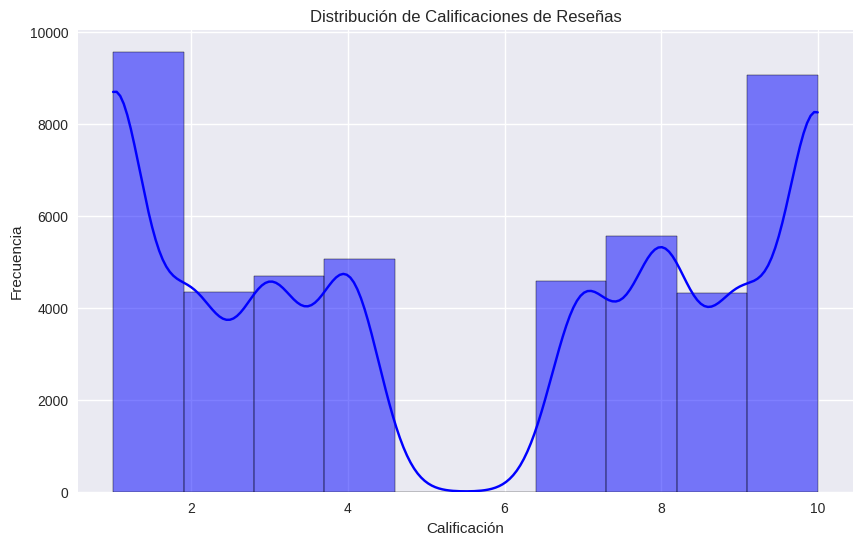

In [11]:
# Distribución de las calificaciones de las reseñas
plt.figure(figsize=(10, 6))
sns.histplot(df_reviews['rating'], bins=10, kde=True, color='blue')
plt.title('Distribución de Calificaciones de Reseñas')
plt.xlabel('Calificación')
plt.ylabel('Frecuencia')
plt.show()

La distribución de las calificaciones de las reseñas (rating) tiene una media de aproximadamente 5.48, lo que indica que en promedio las reseñas tienden a ser moderadas.   
La desviación estándar es de 3.47, sugiriendo una amplia variabilidad en las calificaciones. La mediana es 4, lo que significa que la mitad de las reseñas tienen una calificación de 4 o menor.

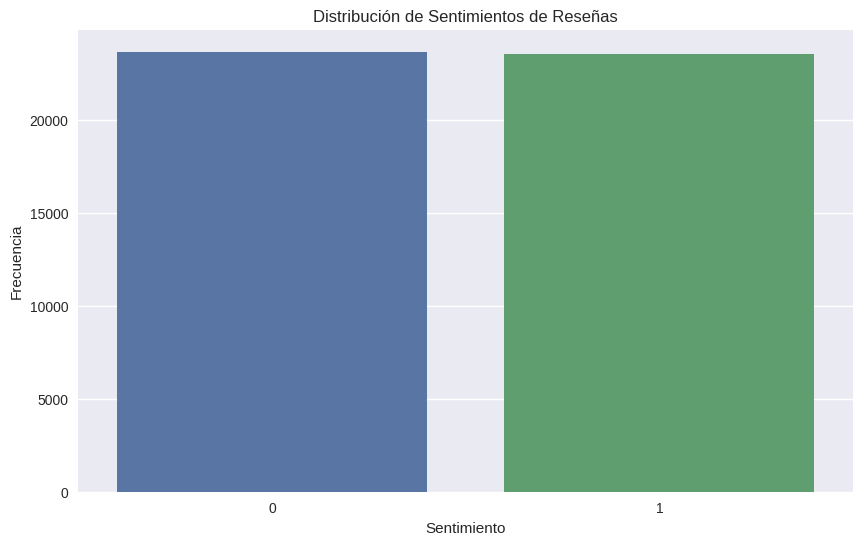

In [12]:
# Distribución de los sentimientos de las reseñas
plt.figure(figsize=(10, 6))
sns.countplot(x='pos', data=df_reviews)
plt.title('Distribución de Sentimientos de Reseñas')
plt.xlabel('Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


En el sentimiento de las reseñas (pos), hay un equilibrio casi perfecto entre las reseñas positivas (etiquetadas como '1') y negativas (etiquetadas como '0'), con una media cercana a 0.50 y una desviación estándar mínima, lo que indica un balance casi uniforme en el conjunto de datos.

**Observaciones de la salida después de usar describe():**

Estas observaciones sugieren que el conjunto de datos está equilibrado en términos de sentimientos y tiene una variabilidad considerable en las calificaciones de las reseñas.

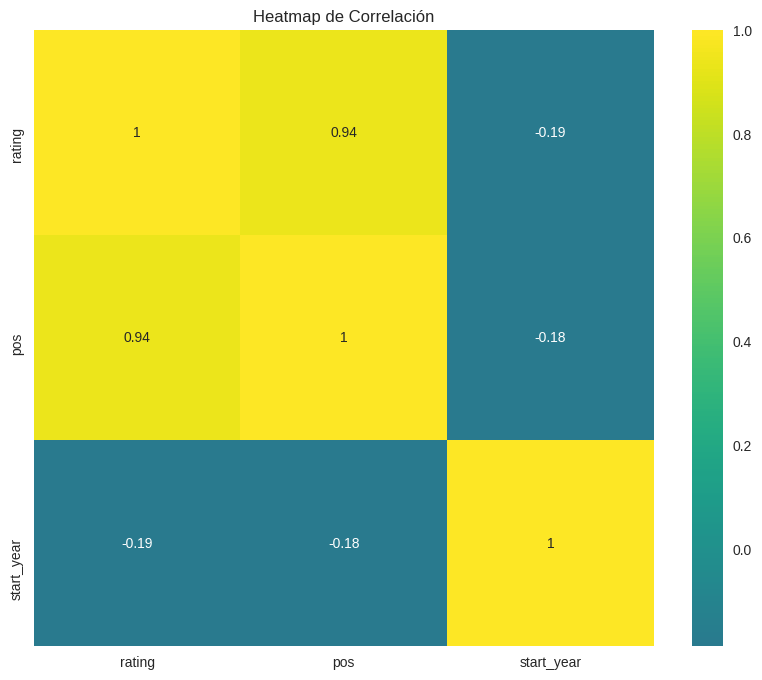

In [13]:
# Buscar correlación entre reseñas y sentimientos de la reseñas con un heatmap

# Calcular la matriz de correlación
correlation_matrix = df_reviews.corr()

# Crear un heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', center=0)
plt.title('Heatmap de Correlación')
plt.show()


**Observaciones de al salida del heatmap**

El heatmap muestra una alta correlación (0.94) entre las calificaciones (rating) y el sentimiento positivo (pos). Lo que indica una fuerte relación entre ambos, donde las calificaciones altas tienden a corresponder con sentimientos positivos.

### Conclusión de preprocesamiento de datos

- Se verificó usando el método info() que los tipos de datos en las columnas fueran adecuados para su psoterior manejo
- Se eliminaron las columnas irrelevantes para el entrenamiento del modelo, manteniendo las oclumnas 'tconst', 'review', 'rating', 'sp', 'pos', 'ds_part', 'genres',  'start_year'
- Se verificó la existencia de valores nulos y duplicados, se elimaron 85 filas duplicadas del dataset, por no tener un efecto significativo con el conjunto de datos y para optimizar el aprendizaje del modelo
- Se hizo una revisión de métricas estadísticas de las columnas numéricas usando el método describe()
- Se analizó la distribución de las métricas clave 'rating' y 'pos'
- Se agregó un heatmap de correlación entre las columnas 'rating' y 'pos' que msotró una fuerte relación entre ambas. Evidenciando una dependencia fuerte entre las calificaciones de los usuarios y sentimeinto de las reseñas. (Las calificaciones altas tienden a corresponder con sentimientos positivos).

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Excelente Ricardo, la revisión de las métricas estadísticas, como la media, mediana y desviación estándar, proporciona una comprensión clara de la distribución de las calificaciones y el sentimiento de las reseñas. El hallazgo de una alta correlación entre las calificaciones y el sentimiento positivo es particularmente relevante, ya que refuerza la idea de que las reseñas con calificaciones altas tienden a ser positivas.

</div>

## EDA

Veamos el número de películas y reseñas a lo largo de los años.

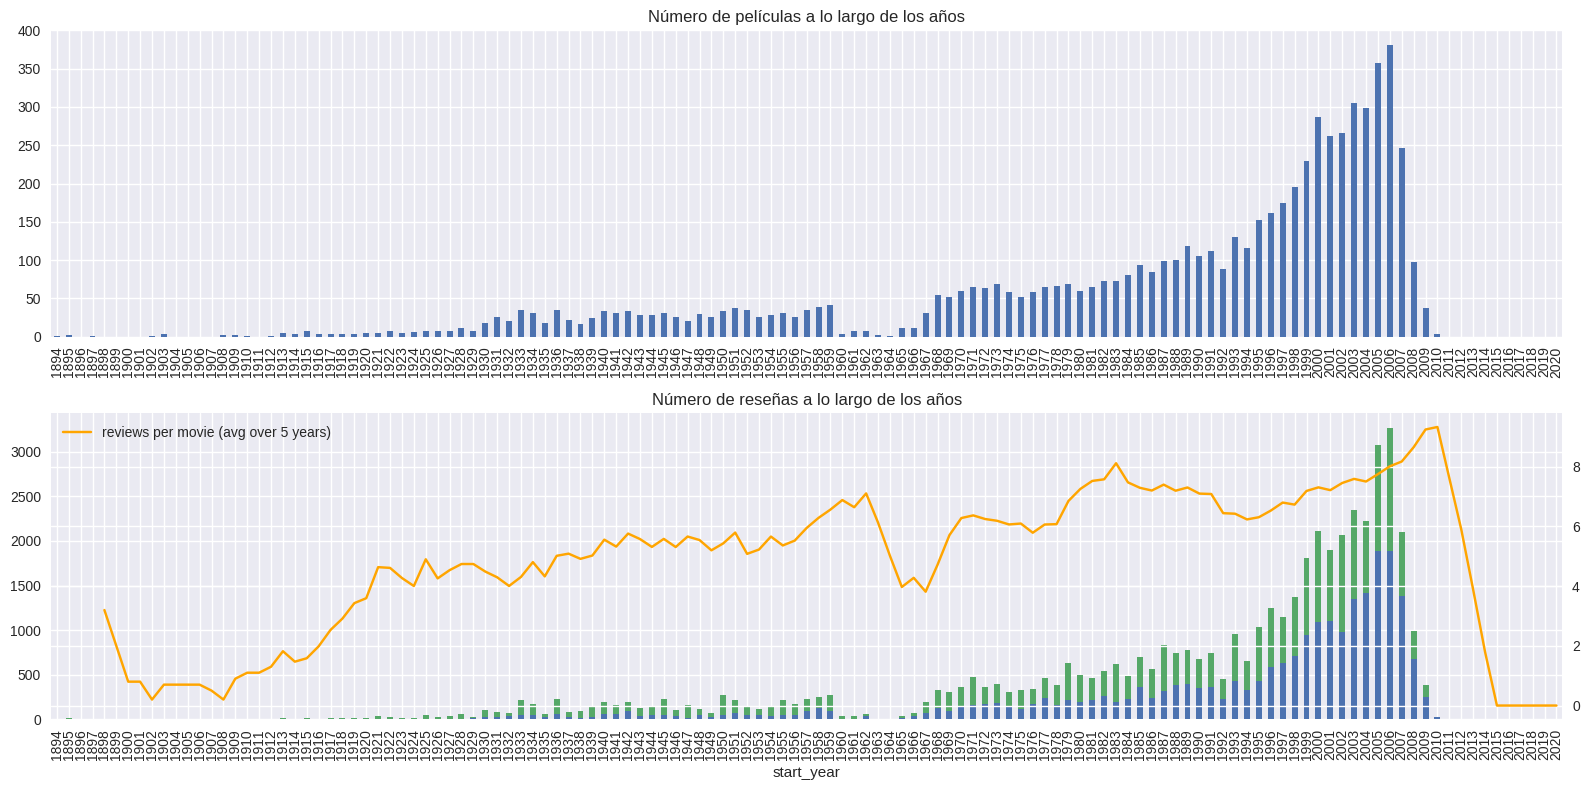

In [14]:
# Código preecargado para visualizar el número de películas y reseñas a lo largo de los años
fig, axs = plt.subplots(2, 1, figsize=(16, 8))

ax = axs[0]

dft1 = df_reviews[['tconst', 'start_year']].drop_duplicates() \
    ['start_year'].value_counts().sort_index()
dft1 = dft1.reindex(index=np.arange(dft1.index.min(), max(dft1.index.max(), 2021))).fillna(0)
dft1.plot(kind='bar', ax=ax)
ax.set_title('Número de películas a lo largo de los años')

ax = axs[1]

dft2 = df_reviews.groupby(['start_year', 'pos'])['pos'].count().unstack()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)

dft2.plot(kind='bar', stacked=True, label='#reviews (neg, pos)', ax=ax)

dft2 = df_reviews['start_year'].value_counts().sort_index()
dft2 = dft2.reindex(index=np.arange(dft2.index.min(), max(dft2.index.max(), 2021))).fillna(0)
dft3 = (dft2/dft1).fillna(0)
axt = ax.twinx()
dft3.reset_index(drop=True).rolling(5).mean().plot(color='orange', label='reviews per movie (avg over 5 years)', ax=axt)

lines, labels = axt.get_legend_handles_labels()
ax.legend(lines, labels, loc='upper left')

ax.set_title('Número de reseñas a lo largo de los años')

fig.tight_layout()

Veamos la distribución del número de reseñas por película con el conteo exacto y KDE (solo para saber cómo puede diferir del conteo exacto)

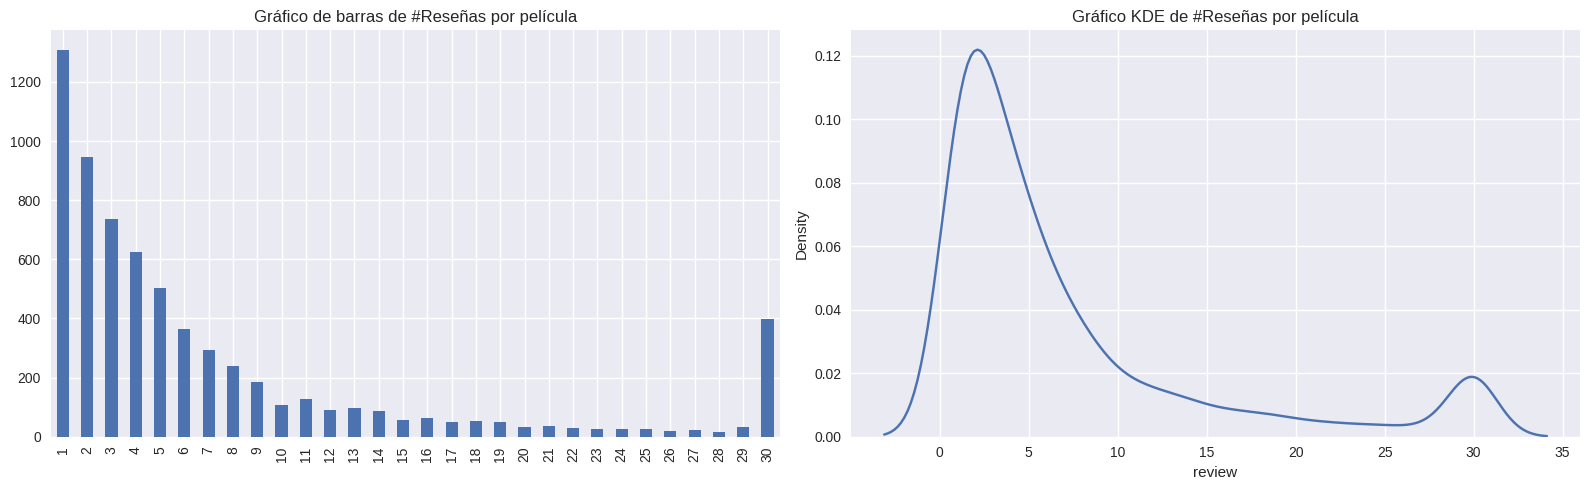

In [15]:
# Código preecargado para visualizar la distribución del número de reseñas por películas con el conteo exacto y KDE
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

ax = axs[0]
dft = df_reviews.groupby('tconst')['review'].count() \
    .value_counts() \
    .sort_index()
dft.plot.bar(ax=ax)
ax.set_title('Gráfico de barras de #Reseñas por película')

ax = axs[1]
dft = df_reviews.groupby('tconst')['review'].count()
sns.kdeplot(dft, ax=ax)
ax.set_title('Gráfico KDE de #Reseñas por película')

fig.tight_layout()

In [16]:
# Código preecargado, contar las reseñas, 0 negativo y 1 positivo
df_reviews['pos'].value_counts()

0    23682
1    23564
Name: pos, dtype: int64

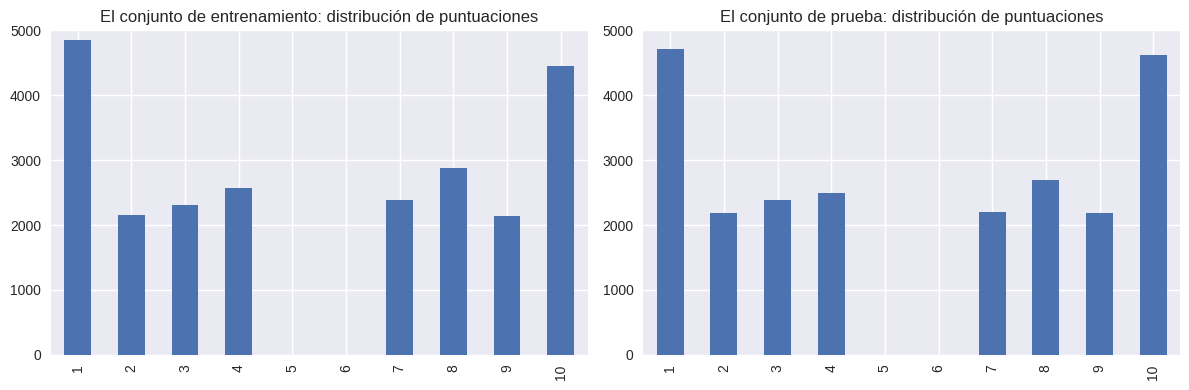

In [17]:
# Código precargado, para visualizar la distribución de puntuaciones
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax = axs[0]
dft = df_reviews.query('ds_part == "train"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de entrenamiento: distribución de puntuaciones')

ax = axs[1]
dft = df_reviews.query('ds_part == "test"')['rating'].value_counts().sort_index()
dft = dft.reindex(index=np.arange(min(dft.index.min(), 1), max(dft.index.max(), 11))).fillna(0)
dft.plot.bar(ax=ax)
ax.set_ylim([0, 5000])
ax.set_title('El conjunto de prueba: distribución de puntuaciones')

fig.tight_layout()

Distribución de reseñas negativas y positivas a lo largo de los años para dos partes del conjunto de datos

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:1666: UserWarning: Support for alternate kernels has been removed. Using Gaussian kernel.
  warnings.warn(msg, UserWarning)


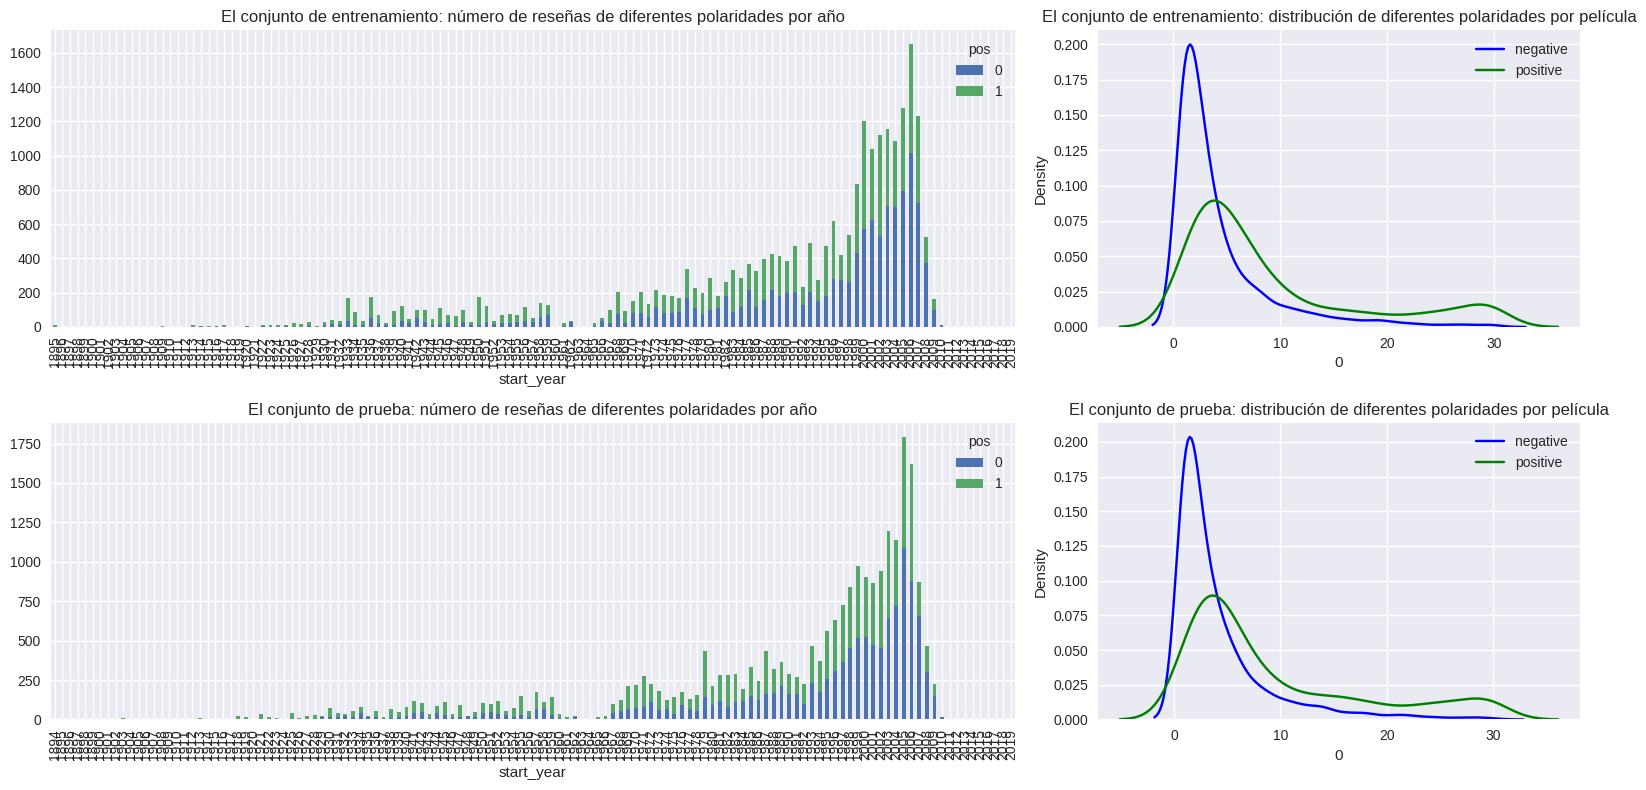

In [18]:
# Código precargado, número de reseñas de diferentes polaridades por año y por película
fig, axs = plt.subplots(2, 2, figsize=(16, 8), gridspec_kw=dict(width_ratios=(2, 1), height_ratios=(1, 1)))

ax = axs[0][0]

dft = df_reviews.query('ds_part == "train"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de entrenamiento: número de reseñas de diferentes polaridades por año')

ax = axs[0][1]

dft = df_reviews.query('ds_part == "train"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de entrenamiento: distribución de diferentes polaridades por película')

ax = axs[1][0]

dft = df_reviews.query('ds_part == "test"').groupby(['start_year', 'pos'])['pos'].count().unstack()
dft.index = dft.index.astype('int')
dft = dft.reindex(index=np.arange(dft.index.min(), max(dft.index.max(), 2020))).fillna(0)
dft.plot(kind='bar', stacked=True, ax=ax)
ax.set_title('El conjunto de prueba: número de reseñas de diferentes polaridades por año')

ax = axs[1][1]

dft = df_reviews.query('ds_part == "test"').groupby(['tconst', 'pos'])['pos'].count().unstack()
sns.kdeplot(dft[0], color='blue', label='negative', kernel='epa', ax=ax)
sns.kdeplot(dft[1], color='green', label='positive', kernel='epa', ax=ax)
ax.legend()
ax.set_title('El conjunto de prueba: distribución de diferentes polaridades por película')

fig.tight_layout()

Tanto las reseñas negativas como positivas tienden a tener longitudes similares, pero hay más reseñas negativas en cada intervalo de longitud.

### Conclusión de EDA

El análisis muestra que el número de películas y reseñas ha variado a lo largo de los años. En particular, las reseñas negativas superan a las positivas en cada intervalo de longitud, aunque ambas tienden a tener longitudes similares. La visualización también destaca la tendencia de las reseñas por película, con una media móvil de 5 años. 
Estas observaciones pueden ayudar a entender mejor la evolución de las películas y las reseñas de los espectadores a lo largo del tiempo.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Ricardo hiciste un excelente análisis exploratorio de datos evaluando el balance entre las clases que se van a predecir y comparando los datos de entrenamiento y prueba. Esto es clave para estar seguros que los modelos predictivos no se van a ver afectados por la estructura de los datos. Adicionalmente seleccionaste herramientas de visualización claves para lograr entender la distribución de los datos.

    

</div>

## Procedimiento de evaluación

Composición de una rutina de evaluación que se pueda usar para todos los modelos en este proyecto

In [19]:
# Función simplificada para evaluar el desempeño de los modelos 'evaluate_model_simplified'.
def evaluate_model_simplified(model, X_train, y_train, X_test, y_test):
    # Diccionario para guardar estadísticas de evaluación
    eval_stats = {}

    # Predicciones y probabilidades
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    y_train_proba = model.predict_proba(X_train)[:, 1] # Se seleccionan todas las filas y la segunda columna(positivos)
    y_test_proba = model.predict_proba(X_test)[:, 1] # Se seleccionan todas las filas y la segunda columna(positivos)

    # Calcular métricas
    eval_stats['train'] = {
        'Accuracy': metrics.accuracy_score(y_train, y_train_pred),
        'F1': metrics.f1_score(y_train, y_train_pred),
        'ROC AUC': metrics.roc_auc_score(y_train, y_train_proba)
    }
    eval_stats['test'] = {
        'Accuracy': metrics.accuracy_score(y_test, y_test_pred),
        'F1': metrics.f1_score(y_test, y_test_pred),
        'ROC AUC': metrics.roc_auc_score(y_test, y_test_proba)
    }

    # Crear gráficos de evaluación
    fig, axs = plt.subplots(1, 2, figsize=(12, 6))

    # Curva ROC
    for set_type, (y_true, y_proba, color) in zip(['train', 'test'], [(y_train, y_train_proba, 'blue'), (y_test, y_test_proba, 'green')]):
        fpr, tpr, _ = metrics.roc_curve(y_true, y_proba) # False Positive Rate y True Positive Rate
        axs[0].plot(fpr, tpr, color=color, label=f'{set_type} (AUC = {eval_stats[set_type]["ROC AUC"]:.2f})')

    axs[0].plot([0, 1], [0, 1], color='grey', linestyle='--')
    axs[0].set_xlabel('False Positive Rate')
    axs[0].set_ylabel('True Positive Rate')
    axs[0].set_title('ROC Curve')
    axs[0].legend(loc='lower right')

    # Valor F1 por umbral
    thresholds = np.arange(0, 1.01, 0.05)
    for set_type, (y_true, y_proba, color) in zip(['train', 'test'], [(y_train, y_train_proba, 'blue'), (y_test, y_test_proba, 'green')]):
        f1_scores = [metrics.f1_score(y_true, y_proba >= t) for t in thresholds]
        axs[1].plot(thresholds, f1_scores, color=color, label=f'{set_type} (max F1 = {max(f1_scores):.2f})')

    axs[1].set_xlabel('Threshold')
    axs[1].set_ylabel('F1 Score')
    axs[1].set_title('F1 Score by Threshold')
    axs[1].legend(loc='lower center')

    fig.tight_layout()
    plt.show()

    # Mostrar estadísticas
    df_eval_stats = pd.DataFrame(eval_stats).round(2)
    print(df_eval_stats)

    return

### Conclusión de procedimieto de evaluación

La función evaluate_model_simplified calcula métricas clave como Accuracy, F1 Score y ROC AUC para los conjuntos de entrenamiento y prueba, y las presenta en gráficos visuales.
Este enfoque no solo cuantifica la precisión del modelo, sino que también facilita una interpretación visual de su rendimiento, lo que ayuda a identificar posibles áreas de mejora.

## Normalización

In [20]:
# Convertir el texto a minúsculas y eliminar caracteres innecesarios usando la función 'clean_text'
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# Aplicar la función de limpieza al dataset
df_reviews['cleaned_review'] = df_reviews['review'].apply(clean_text)

# Tokenización
df_reviews['tokenized_review'] = df_reviews['cleaned_review'].apply(word_tokenize)
print(df_reviews[['review', 'cleaned_review', 'tokenized_review']].head())

                                              review  \
0  The pakage implies that Warren Beatty and Gold...   
1  How the hell did they get this made?! Presenti...   
2  There is no real story the film seems more lik...   
3  Um .... a serious film about troubled teens in...   
4  I'm totally agree with GarryJohal from Singapo...   

                                      cleaned_review  \
0  the pakage implies that warren beatty and gold...   
1  how the hell did they get this made presenting...   
2  there is no real story the film seems more lik...   
3  um  a serious film about troubled teens in sin...   
4  im totally agree with garryjohal from singapor...   

                                    tokenized_review  
0  [the, pakage, implies, that, warren, beatty, a...  
1  [how, the, hell, did, they, get, this, made, p...  
2  [there, is, no, real, story, the, film, seems,...  
3  [um, a, serious, film, about, troubled, teens,...  
4  [im, totally, agree, with, garryjohal, from, s..

In [21]:
# Inicialización del lematizador
lemmatizer = WordNetLemmatizer()

# Lematización de las palabras
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

df_reviews['lemmatized_review'] = df_reviews['tokenized_review'].apply(lemmatize_tokens)
print(df_reviews[['tokenized_review', 'lemmatized_review']].head())

                                    tokenized_review  \
0  [the, pakage, implies, that, warren, beatty, a...   
1  [how, the, hell, did, they, get, this, made, p...   
2  [there, is, no, real, story, the, film, seems,...   
3  [um, a, serious, film, about, troubled, teens,...   
4  [im, totally, agree, with, garryjohal, from, s...   

                                   lemmatized_review  
0  [the, pakage, implies, that, warren, beatty, a...  
1  [how, the, hell, did, they, get, this, made, p...  
2  [there, is, no, real, story, the, film, seems,...  
3  [um, a, serious, film, about, troubled, teen, ...  
4  [im, totally, agree, with, garryjohal, from, s...  


In [22]:
# Obtener stopwords en inglés
stop_words = set(stopwords.words('english'))

# Eliminar stopwords
def remove_stopwords(tokens):
    return [token for token in tokens if token not in stop_words]

df_reviews['final_review'] = df_reviews['lemmatized_review'].apply(remove_stopwords)
print(df_reviews[['lemmatized_review', 'final_review']].head())

                                   lemmatized_review  \
0  [the, pakage, implies, that, warren, beatty, a...   
1  [how, the, hell, did, they, get, this, made, p...   
2  [there, is, no, real, story, the, film, seems,...   
3  [um, a, serious, film, about, troubled, teen, ...   
4  [im, totally, agree, with, garryjohal, from, s...   

                                        final_review  
0  [pakage, implies, warren, beatty, goldie, hawn...  
1  [hell, get, made, presenting, caper, comedy, m...  
2  [real, story, film, seems, like, fly, wall, dr...  
3  [um, serious, film, troubled, teen, singapore,...  
4  [im, totally, agree, garryjohal, singapore, co...  


### Conclusión de normalización

El preprocesamiento de texto convierte las reseñas en minúsculas, elimina caracteres innecesarios, tokeniza, lematiza y filtra y borra las stopwords, para proporcionar una versión más limpia y adecuada para el análisis y modelado. 
Este enfoque mejora la calidad de los datos textuales y facilita la extracción de características relevantes para su posterior uso en modelos de aprendizaje automático.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Perfecto proceso de normalización, esto es muy importante para aumentar el rendimiento de los modelos. Tu estrategía de normalización incluyendo el uso de expresiones regulares es adecuada, aunque quiero compartirte este artículo para conoce [estrategías de normalización](https://spotintelligence.com/2023/01/25/text-normalization-techniques-nlp/) de texto que te puede ser útil para futros proyectos

</div>

## División entrenamiento / prueba

Por fortuna, todo el conjunto de datos ya está dividido en partes de entrenamiento/prueba; 'ds_part' es el indicador correspondiente.

In [23]:
# Código preecargado para filtrar los datos, dividir el conjunto de entrenamiento y 
df_reviews_train = df_reviews.query('ds_part == "train"').copy()
df_reviews_test = df_reviews.query('ds_part == "test"').copy()

# Etiquetado de objetivo de entrenamiento y prueba
train_target = df_reviews_train['pos']
test_target = df_reviews_test['pos']

# Mostrar el tamaño de los ocnjuntos de entrenamiento y prueba
print(df_reviews_train.shape)
print(df_reviews_test.shape)

(23760, 12)
(23486, 12)


### Conclusión de división entrenamiento / prueba

Se dividen los datos en conjuntos de entrenamiento y prueba, etiquetando los objetivos de cada conjunto para su uso posterior en modelos de aprendizaje automático. 
Esto permite evaluar el rendimiento del modelo en datos no vistos. El tamaño de los conjuntos se muestra para confirmar la correcta partición de los datos.

## Trabajar con modelos

### Modelo 0 - Constante

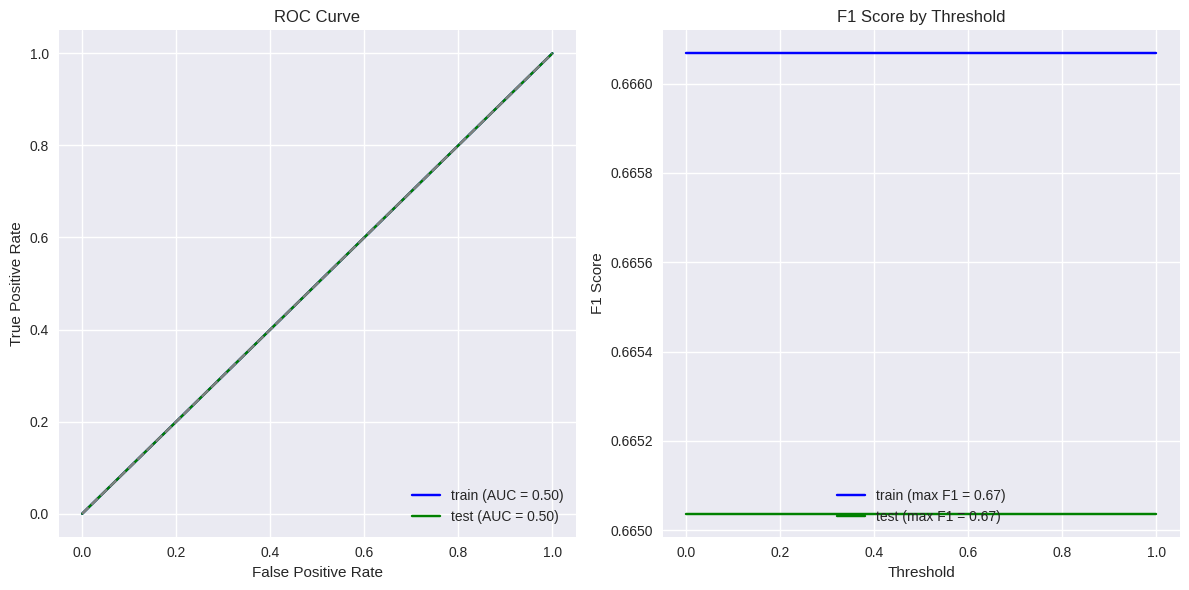

          train  test
Accuracy   0.50  0.50
F1         0.67  0.67
ROC AUC    0.50  0.50


In [24]:
# Definir modelo dummy como dummy_clf con constant = 1
dummy_clf = DummyClassifier(strategy='constant', constant=1)

# Entrenar modelo dummy
dummy_clf_trained = dummy_clf.fit(X=df_reviews_train, y=train_target)

# Usar la función simplificada 'evaluate_model_simplified' para evaluar el modelo dummy
evaluate_model_simplified(dummy_clf_trained, np.zeros((len(train_target), 1)), train_target, np.zeros((len(test_target), 1)), test_target)

La evaluación del modelo dummy demuestra un rendimiento de referencia, donde se clasifica todas las observaciones en una única clase constante (en este caso, 1). 
Este enfoque permite comparar la efectividad de modelos más avanzados al ofrecer un punto de referencia básico para la predicción.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>
    
Buen trabajo con el desarrollo del modelo dummy, ahora tenemos un valor de referencia para evaluar el rendimiento de los modelos y estar seguros que las predicciones no sean solo azar. 

</div>

### Modelo 1 - NLTK, TF-IDF y LR

TF-IDF

In [25]:
# Convertir las listas de tokens a cadenas de texto para ser procesadas por el vectorizador TF-IDF
df_reviews_train['final_review_text'] = df_reviews_train['final_review'].apply(lambda x: ' '.join(x))
df_reviews_test['final_review_text'] = df_reviews_test['final_review'].apply(lambda x: ' '.join(x))

# Inicializar y ajustar el vectorizador TF-IDF, eliminar stop words en inglés y cambiar letras a minúsculas
tfidf_vectorizer = TfidfVectorizer(stop_words=stop_words, lowercase= True, max_features=5000)
train_features_vectorized = tfidf_vectorizer.fit_transform(df_reviews_train['final_review_text'])
test_features_vectorized = tfidf_vectorizer.transform(df_reviews_test['final_review_text'])

# Motrar dimensiones de los conjuntos de entrenamiento y prueba vectorizados
print(train_features_vectorized.shape)
print(test_features_vectorized.shape)

(23760, 5000)
(23486, 5000)


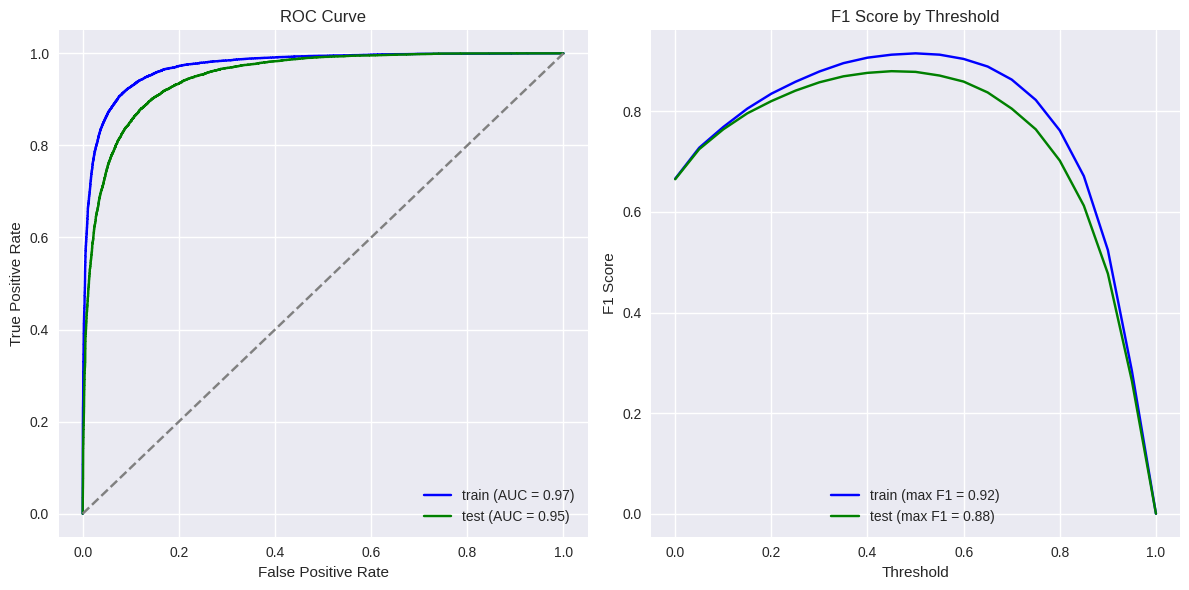

          train  test
Accuracy   0.91  0.88
F1         0.92  0.88
ROC AUC    0.97  0.95


In [26]:
# Entrenar el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(train_features_vectorized, df_reviews_train['pos'])

# Evaluar el modelo de Regresión Logística con la función simplificada
evaluate_model_simplified(log_reg, train_features_vectorized, df_reviews_train['pos'], test_features_vectorized, df_reviews_test['pos'])

El código convierte listas de tokens en cadenas de texto, vectoriza las reseñas con TF-IDF, entrena un modelo de regresión logística y evalúa su desempeño. 
Esto proporciona un enfoque estructurado para analizar y clasificar reseñas, garantizando una evaluación efectiva del modelo de aprendizaje automático.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Perfecta comparativa entre los datos de entrenamiento y prueba. De manera general, podemos ver que el conjunto de entrenamiento tiene un mejor rendimiento, lo que puede ser un indicio de un sobreajuste (overfitting); no obstante, el rendimiento con los datos de prueba también es muy bueno. 

</div>m

### Modelo 3 - spaCy, TF-IDF y LR

/opt/conda/envs/python3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


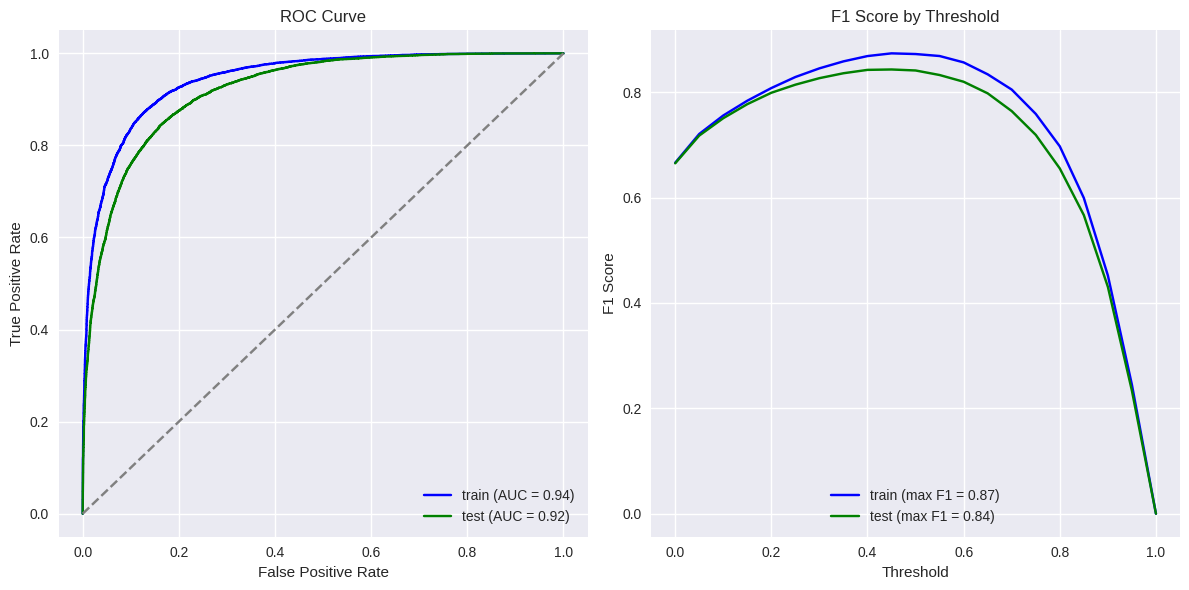

          train  test
Accuracy   0.87  0.84
F1         0.87  0.84
ROC AUC    0.94  0.92


In [27]:
# Cargar el modelo spaCy pequeño para ahorrar tiempo y recursos
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner', 'tagger'])

# Función para convertir el texto en minúsculas, eliminar stopwords y tokens no alfabéticos, y aplicar lematización
def text_preprocessing_3(text):
    doc = nlp(text.lower()[:1000])  # Limitar a los primeros 1000 caracteres
    tokens = [token.lemma_ for token in doc if not token.is_stop and token.is_alpha]
    return ' '.join(tokens)

# Procesar los datos en paralelo
def parallel_preprocessing(texts, n_jobs=-1):
    return Parallel(n_jobs=n_jobs)(delayed(text_preprocessing_3)(text) for text in texts)

# Aplicar la función de preprocesamiento a las reseñas
df_reviews_train['review_tokenized_3'] = parallel_preprocessing(df_reviews_train['review'])
df_reviews_test['review_tokenized_3'] = parallel_preprocessing(df_reviews_test['review'])

# Vectorización con TF-IDF
tfidf_vectorizer_3 = TfidfVectorizer(max_features=2000)  # Reducir a 2000 características
train_corpus_3 = df_reviews_train['review_tokenized_3']
test_corpus_3 = df_reviews_test['review_tokenized_3']

train_features_3 = tfidf_vectorizer_3.fit_transform(train_corpus_3)
test_features_3 = tfidf_vectorizer_3.transform(test_corpus_3)

# Definir el modelo de regresión logística
model_lr = LogisticRegression()

# Entrenar el modelo de regresión logística con las características vectorizadas y etiquetas del objetivo de entrenamiento
model_lr.fit(train_features_3, df_reviews_train['pos'])

# Evaluar el modelo utilizando la función predefinida
evaluate_model_simplified(model_lr, train_features_3, df_reviews_train['pos'], test_features_3, df_reviews_test['pos'])

El código preprocesa las reseñas con spaCy, vectoriza los textos con TF-IDF, entrena un modelo de regresión logística con 2000 características para ahorrar memoria y evalúa su desempeño. 
Esto optimiza la clasificación de reseñas, combinando técnicas de NLP y aprendizaje automático.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Acá tenemos un comportamiento similar al modelo anterior, esto era de esperarse y nos indica que tenemos consistencia en la implementación

</div>

### Modelo 4 - spaCy, TF-IDF y LGBMClassifier

/opt/conda/envs/python3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


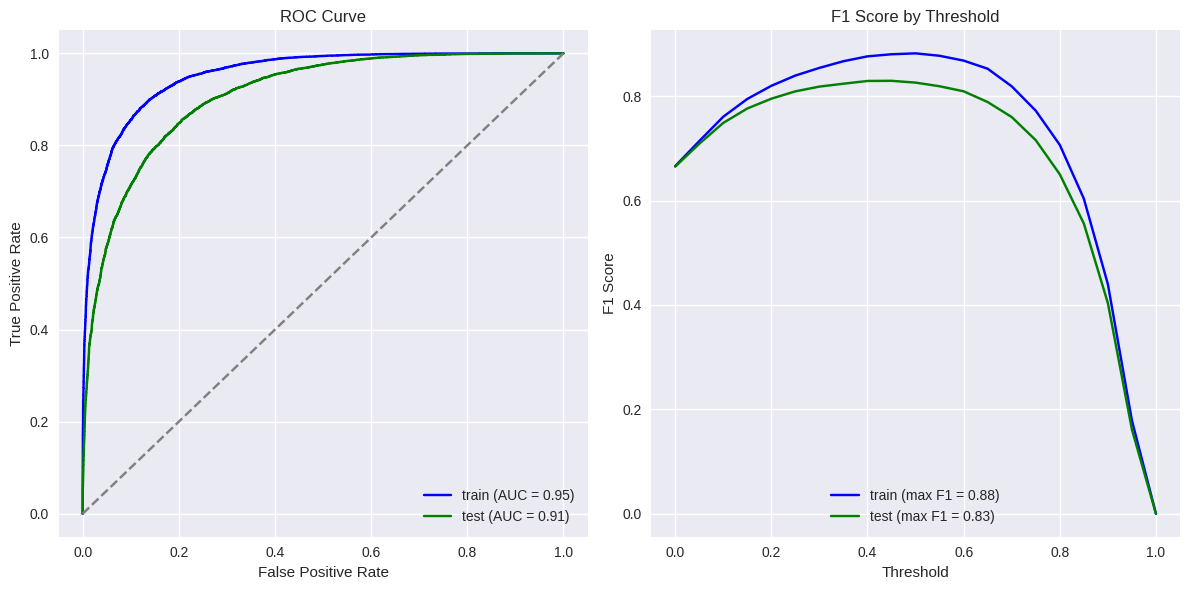

          train  test
Accuracy   0.88  0.82
F1         0.88  0.83
ROC AUC    0.95  0.91


In [28]:
# Aplicar la función de preprocesamiento a las reseñas
df_reviews_train['review_tokenized_4'] = parallel_preprocessing(df_reviews_train['review'])
df_reviews_test['review_tokenized_4'] = parallel_preprocessing(df_reviews_test['review'])

# Vectorización con TF-IDF
tfidf_vectorizer_4 = TfidfVectorizer(max_features=2000)  # Reducir a 2000 características
train_corpus_4 = df_reviews_train['review_tokenized_4']
test_corpus_4 = df_reviews_test['review_tokenized_4']

# Entrenamiento del modelo
train_features_4 = tfidf_vectorizer_4.fit_transform(train_corpus_4)
test_features_4 = tfidf_vectorizer_4.transform(test_corpus_4)

# Definir el modelo LGBMClassifier
model_lgbm = LGBMClassifier()

# Entrenar el modelo LGBMClassifier con las características vectorizadas y etiquetas del objetivo de entrenamiento
model_lgbm.fit(train_features_4, df_reviews_train['pos'])

# Evaluar el modelo utilizando la función simplificada
evaluate_model_simplified(model_lgbm, train_features_4, df_reviews_train['pos'], test_features_4, df_reviews_test['pos'])



Este modelo preprocesa las reseñas con funciones paralelas, las vectoriza con TF-IDF limitando a 2000 características para ahorrar memoria y entrena un modelo LGBMClassifier. Finalmente, se evalúa el desempeño.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (2da Iteración)</b> <a class=“tocSkip”></a>

Los resultados en los tres modelos son consistentes, esto es claro indicio de una buena implementación del código. Buen trabajo

</div>

###  Modelo 9 - BERT

In [29]:
# Inicialización del tokenizador y selección del modelo BertModel
tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
config = transformers.BertConfig.from_pretrained('bert-base-uncased')
model = transformers.BertModel.from_pretrained('bert-base-uncased')

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [30]:
# Función para transformar lista de textos a embeddings usando un modelo BERT con parámetros seleccionados para ahorrar memoria
def BERT_text_to_embeddings(texts, max_length=128, batch_size=5, force_device=None, disable_progress_bar=False):
    ids_list = []
    attention_mask_list = []

    # Configuración de logging para suprimir algunos mensajes de advertencia
    logging.getLogger("transformers.tokenization_utils").setLevel(logging.ERROR)

    # Procesar cada texto individualmente
    for text in texts:
        ids = tokenizer.encode(text.lower(), add_special_tokens=True, truncation=True, max_length=max_length)
        # Padding
        padded = np.array(ids[:max_length] + [0] * (max_length - len(ids)))
        # Crear la máscara de atención
        attention_mask = np.where(padded != 0, 1, 0)

        # Agregar ids y la máscara a las listas
        ids_list.append(padded)
        attention_mask_list.append(attention_mask)
    
    # Dispositivo
    if force_device is not None:
        device = torch.device(force_device)
    else:
        device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
        
    model.to(device)
    if not disable_progress_bar:
        print(f'Uso del dispositivo {device}.')
    
    # Obtener embeddings en lotes
    embeddings = []

    for i in tqdm(range(math.ceil(len(ids_list) / batch_size)), disable=disable_progress_bar):
        ids_batch = torch.LongTensor(ids_list[batch_size * i: batch_size * (i + 1)]).to(device)
        attention_mask_batch = torch.LongTensor(attention_mask_list[batch_size * i: batch_size * (i + 1)]).to(device)
                    
        with torch.no_grad():
            model.eval()
            batch_embeddings = model(input_ids=ids_batch, attention_mask=attention_mask_batch)
        embeddings.append(batch_embeddings[0][:, 0, :].detach().cpu().numpy())
        
        # Liberar memoria
        del ids_batch, attention_mask_batch, batch_embeddings
        torch.cuda.empty_cache()
        
    return np.concatenate(embeddings)

In [31]:
# Segmentación de datos para incluir sólo 20 datos para utilizar BERT
df_reviews_train_sample = df_reviews_train['final_review_text'].iloc[0:20]
df_reviews_test_sample = df_reviews_test['final_review_text'].iloc[0:20]

# Obtener embeddings para el conjunto de entrenamiento
train_features_9 = BERT_text_to_embeddings(df_reviews_train_sample, max_length=128, batch_size=5, force_device=None, disable_progress_bar=False)

# Obtener embeddings para el conjunto de prueba
test_features_9 = BERT_text_to_embeddings(df_reviews_test_sample, max_length=128, batch_size=5, force_device=None, disable_progress_bar=False)

# Definir el objetivo
target_9 = df_reviews.iloc[0:20]['pos']

Uso del dispositivo cpu.


  0%|          | 0/4 [00:00<?, ?it/s]

/tmp/ipykernel_50/2724887742.py:35: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  ids_batch = torch.LongTensor(ids_list[batch_size * i: batch_size * (i + 1)]).to(device)


Uso del dispositivo cpu.


  0%|          | 0/4 [00:00<?, ?it/s]

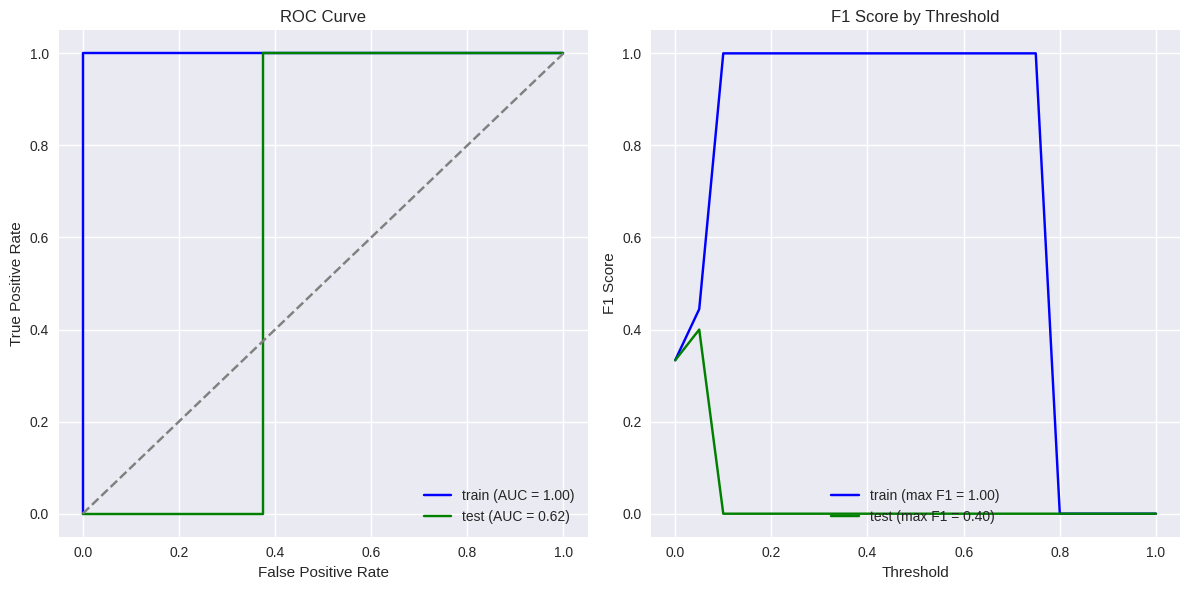

          train  test
Accuracy    1.0  0.80
F1          1.0  0.00
ROC AUC     1.0  0.62


In [32]:
# División de datos para entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(train_features_9, target_9, test_size=0.5, random_state=42)

# Entrenamiento del modelo
model_9 = LogisticRegression()
model_9.fit(X_train, y_train)

# Evaluación del modelo
pred_9 = model_9.predict(X_train)
evaluate_model_simplified(model_9, X_train, y_train, X_test, y_test)

In [33]:
# Guardar los embeddings
np.savez_compressed('features_9.npz', train_features_9=train_features_9, test_features_9=test_features_9)

# Cargar los embeddings cuando los necesites
with np.load('features_9.npz') as data:
    train_features_9 = data['train_features_9']
    test_features_9 = data['test_features_9']

El modelo convierte textos en embeddings utilizando BERT, segmenta los datos en conjuntos de entrenamiento y prueba, entrena un modelo de regresión logística y evalúa su desempeño. 
Este enfoque optimiza la clasificación de reseñas mediante el uso de NLP y aprendizaje automático.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Respecto al modelo BERT, puede resultar excesivo en tiempo de ejecución, pero la idea es que lo conozcas para que un futuro sea una opción como herramienta de análisis de lenguaje. BERT destaca en NLP por su comprensión bidireccional del contexto, lo que permite captar mejor las relaciones entre palabras en una oración. Su preentrenamiento en tareas generales, como predicción de palabras y relaciones entre frases, facilita el ajuste a tareas específicas con menor costo computacional. Además, su arquitectura basada en Transformers garantiza eficiencia y escalabilidad, mientras que su capacidad multilingüe y rendimiento superior en benchmarks lo hacen versátil. La amplia adopción y soporte de la comunidad también impulsan su aplicabilidad en proyectos reales, consolidándolo como una herramienta poderosa y flexible.

</div>

### Conclusión de trabajar con modelos

De los 5 modelos entrenados, el que supera el umbral de al menos 0.85 de F1 score es el modelo 1 o NLTK TF-IDF y LR, siendo el más prometedor.

En el caso de BERT, debido a que el kernel dejaba de funcionar se optó por ahorrar la mayor cantidad de memoria posible. 
De manera similar en lso modelos se limitaron las características a un máximo de 2000 para evitar que el Kernel muriera.

## Mis reseñas

In [34]:
# Código preecargado, puedes eliminar por completo estas reseñas y probar tus modelos en tus propias reseñas; las que se muestran a continuación son solo ejemplos

my_reviews = pd.DataFrame([
    'I did not simply like it, not my kind of movie.',
    'Well, I was bored and felt asleep in the middle of the movie.',
    'I was really fascinated with the movie',    
    'Even the actors looked really old and disinterested, and they got paid to be in the movie. What a soulless cash grab.',
    'I didn\'t expect the reboot to be so good! Writers really cared about the source material',
    'The movie had its upsides and downsides, but I feel like overall it\'s a decent flick. I could see myself going to see it again.',
    'What a rotten attempt at a comedy. Not a single joke lands, everyone acts annoying and loud, even kids won\'t like this!',
    'Launching on Netflix was a brave move & I really appreciate being able to binge on episode after episode, of this exciting intelligent new drama.'
], columns=['review'])

"""
my_reviews = pd.DataFrame([
    'Simplemente no me gustó, no es mi tipo de película.',
    'Bueno, estaba aburrido y me quedé dormido a media película.',
    'Estaba realmente fascinada con la película',    
    'Hasta los actores parecían muy viejos y desinteresados, y les pagaron por estar en la película. Qué robo tan desalmado.',
    '¡No esperaba que el relanzamiento fuera tan bueno! Los escritores realmente se preocuparon por el material original',
    'La película tuvo sus altibajos, pero siento que, en general, es una película decente. Sí la volvería a ver',
    'Qué pésimo intento de comedia. Ni una sola broma tiene sentido, todos actúan de forma irritante y ruidosa, ¡ni siquiera a los niños les gustará esto!',
    'Fue muy valiente el lanzamiento en Netflix y realmente aprecio poder seguir viendo episodio tras episodio de este nuevo drama tan emocionante e inteligente.'
], columns=['review'])
"""

my_reviews['cleaned_review'] = my_reviews['review'].apply(clean_text)
my_reviews['tokenized_review'] = my_reviews['cleaned_review'].apply(nltk.word_tokenize)
my_reviews['lemmatized_review'] = my_reviews['tokenized_review'].apply(lemmatize_tokens)
my_reviews['final_review'] = my_reviews['lemmatized_review'].apply(remove_stopwords)
my_reviews['final_review_text'] = my_reviews['final_review'].apply(lambda x: ' '.join(x))

# Vectorización de las reseñas con TF-IDF
my_reviews_vectorized = tfidf_vectorizer.transform(my_reviews['final_review_text'])

# Clasificación de las reseñas con el modelo entrenado
my_reviews_predictions = log_reg.predict(my_reviews_vectorized)

# Agregar las predicciones al DataFrame
my_reviews['predicted_sentiment'] = my_reviews_predictions

print(my_reviews[['review', 'predicted_sentiment']])

                                              review  predicted_sentiment
0    I did not simply like it, not my kind of movie.                    0
1  Well, I was bored and felt asleep in the middl...                    0
2             I was really fascinated with the movie                    1
3  Even the actors looked really old and disinter...                    0
4  I didn't expect the reboot to be so good! Writ...                    0
5  The movie had its upsides and downsides, but I...                    1
6  What a rotten attempt at a comedy. Not a singl...                    0
7  Launching on Netflix was a brave move & I real...                    1


Se preprocesa y vectoriza las reseñas de ejemplo y se utiliza un modelo entrenado para predecir el sentimiento de cada reseña. Las predicciones se agregan al DataFrame, permitiendo la clasificación de las reseñas basadas en el modelo de aprendizaje automático.

### Ejemplo utilizando el Modelo 1 (NLTK, TF-IDF y LR)

In [35]:
# Obtener los textos de las reseñas procesadas
texts = my_reviews['final_review_text']

# Obtener las probabilidades de predicción
my_reviews_pred_prob = log_reg.predict_proba(tfidf_vectorizer.transform(texts))[:, 1]

# Imprimir las probabilidades de predicción junto con las reseñas (primeros 100 caracteres)
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.20:  simply like kind movie
0.15:  well wa bored felt asleep middle movie
0.54:  wa really fascinated movie
0.10:  even actor looked really old disinterested got paid movie soulless cash grab
0.20:  didnt expect reboot good writer really cared source material
0.57:  movie upside downside feel like overall decent flick could see going see
0.05:  rotten attempt comedy single joke land everyone act annoying loud even kid wont like
0.95:  launching netflix wa brave move really appreciate able binge episode episode exciting intelligent ne


Las reseñas se procesan en probabilidades de predicción mediante un modelo de regresión logística entrenado, y se imprimen estas probabilidades junto con las reseñas.

### Modelo 3 spaCy, TF-IDF y LR

In [36]:
# Obtener los textos de las reseñas procesadas
texts = my_reviews['final_review_text']

# Preprocesar y vectorizar los textos de las reseñas
texts_preprocessed = texts.apply(lambda x: text_preprocessing_3(x))
texts_features = tfidf_vectorizer_3.transform(texts_preprocessed)

# Obtener las probabilidades de predicción
my_reviews_pred_prob = model_lr.predict_proba(texts_features)[:, 1]

# Imprimir las Probabilidades de Predicción con las Reseñas:
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.15:  simply like kind movie
0.10:  well wa bored felt asleep middle movie
0.41:  wa really fascinated movie
0.06:  even actor looked really old disinterested got paid movie soulless cash grab
0.40:  didnt expect reboot good writer really cared source material
0.28:  movie upside downside feel like overall decent flick could see going see
0.03:  rotten attempt comedy single joke land everyone act annoying loud even kid wont like
0.93:  launching netflix wa brave move really appreciate able binge episode episode exciting intelligent ne


/opt/conda/envs/python3/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  warnings.warn(Warnings.W108)


El ejemplo de modelo preprocesa y vectoriza las reseñas, luego utiliza un modelo de regresión logística para predecir las probabilidades de sentimiento.

### Modelo 4 spaCy, TF-IDF y LGBMClassifier

In [37]:
# Obtener los textos de las reseñas procesadas
texts = my_reviews['final_review_text']

# Preprocesar y vectorizar los textos de las reseñas
texts_preprocessed = texts.apply(lambda x: text_preprocessing_3(x))
texts_features = tfidf_vectorizer_4.transform(texts_preprocessed)

# Obtener las probabilidades de predicción con el modelo LGBMClassifier
my_reviews_pred_prob = model_lgbm.predict_proba(texts_features)[:, 1]

# Imprimir las Probabilidades de Predicción con las Reseñas:
for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')


0.56:  simply like kind movie
0.37:  well wa bored felt asleep middle movie
0.61:  wa really fascinated movie
0.33:  even actor looked really old disinterested got paid movie soulless cash grab
0.61:  didnt expect reboot good writer really cared source material
0.49:  movie upside downside feel like overall decent flick could see going see
0.10:  rotten attempt comedy single joke land everyone act annoying loud even kid wont like
0.74:  launching netflix wa brave move really appreciate able binge episode episode exciting intelligent ne


Se preprocesa y vectoriza las reseñas, luego se utiliza un modelo LGBMClassifier para predecir las probabilidades de sentimiento.

### Modelo 9 BERT

In [38]:
# Extracción de texto 
texts = my_reviews['final_review_text']

#Conversión de textos a embeddings
my_reviews_features_9 = BERT_text_to_embeddings(texts, disable_progress_bar=True)

# Predicción de probabilidad para cada clase
my_reviews_pred_prob = model_9.predict_proba(my_reviews_features_9)[:, 1]

for i, review in enumerate(texts.str.slice(0, 100)):
    print(f'{my_reviews_pred_prob[i]:.2f}:  {review}')

0.03:  simply like kind movie
0.05:  well wa bored felt asleep middle movie
0.11:  wa really fascinated movie
0.21:  even actor looked really old disinterested got paid movie soulless cash grab
0.05:  didnt expect reboot good writer really cared source material
0.06:  movie upside downside feel like overall decent flick could see going see
0.12:  rotten attempt comedy single joke land everyone act annoying loud even kid wont like
0.14:  launching netflix wa brave move really appreciate able binge episode episode exciting intelligent ne


El modelo preprocesa las reseñas con BERT para obtener embeddings, luego utiliza un modelo de regresión logística entrenado para predecir las probabilidades de sentimiento.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Ricardo hiciste un gran trabajo evaluando el rendimiento de los modelos con reseñas nuevas. En general, se evidencia un buen desempeño de los modelos de clasificación, aunque el rendimiento podría mejorar aún más con algunas técnica de sintonización de hiperpárametros, pero eso puede quedar como trabajo futuro. 


</div>

## Conclusiones

**Mejora del preprocesamiento**: Las técnicas de NLP optimizan la calidad de los datos textuales para un análisis más preciso con vectorización, modelado y entranamiento para contextualizar los contenidos de los datos.

**Uso de modelos avanzados**: Modelos como BERT y LGBMClassifier aumentan la precisión en la clasificación de sentimientos en las reseñas.

**Límite de memoria:** Los modelos avanzados y con datasets complejos impactan de manera significativa el desempeño y velocidad de preprocesamiento, pudiendo inclusive provocar la muerte del kernel por saturación de memoria. Por lo que es recomendable el ajsute de parámetros y limitar el número de características en los modelos que requieren mayor poder de procesamiento.

**Generalidades:** El modelo 1 NLTK TF-IDF y LR es el más prometedor del proyecto. Sin embargo, es improtante considerar que no se utilizó una GPU, de haber sido el caso, es posible que el modelo BERT hubiera presentado unas métricas óptimas al aumentar sus parámetros y número de datos para entrenamiento, pudiendo empatar o incluso superar al modelo 1.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteración)</b> <a class=“tocSkip”></a>

Tus conclusiones reflejan un análisis reflexivo y bien fundamentado sobre el proceso de preprocesamiento y modelado. Destacas adecuadamente cómo las técnicas de NLP, como la vectorización y el uso de modelos avanzados como BERT y LGBM, pueden mejorar la precisión en la clasificación de sentimientos. Sin embargo, también señalas de manera acertada los desafíos técnicos, como el límite de memoria y el impacto en el rendimiento al trabajar con datasets complejos, lo que subraya la importancia de ajustar parámetros y optimizar recursos. La observación sobre el potencial del modelo BERT, si se hubiera utilizado una GPU, es un punto relevante que abre la puerta a futuras mejoras.

</div>

# Lista de comprobación

- [x]  Abriste el notebook
- [x]  Cargaste y preprocesaste los datos de texto para su vectorización
- [x]  Transformaste los datos de texto en vectores
- [x]  Entrenaste y probaste los modelos
- [x]  Se alcanzó el umbral de la métrica
- [x]  Colocaste todas las celdas de código en el orden de su ejecución
- [x]  Puedes ejecutar sin errores todas las celdas de código 
- [x]  Hay conclusiones 